# **Sales Data Analysis**

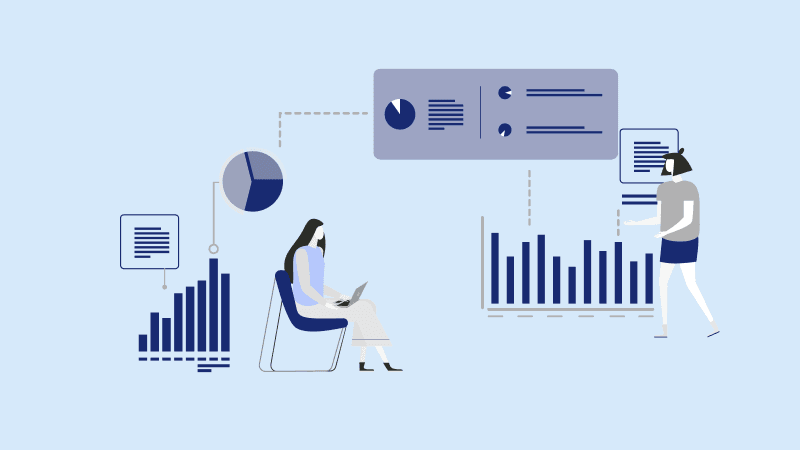

**Objective:** To provide actionable insights for increasing sales and optimizing operations based on the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_df = pd.read_csv('Sales Data.csv')

In [3]:
sales_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# Data Cleaning

## Remove duplicates and handle any missing values.

In [4]:
# 1. Check for duplicate values
print("Duplicate rows:")
print(sales_df.duplicated().sum())

Duplicate rows:
0


In [5]:
# 2. Check for null values
print("\nNull values in each column:")
print(sales_df.isnull().sum())


Null values in each column:
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [6]:
sales_df = sales_df.drop(columns=['Unnamed: 0'])

In [7]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


## Convert data types (e.g., dates, prices) to appropriate formats for analysis.

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [9]:
# Convert the 'Order Date' column to datetime format
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


In [11]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# Data Manipulation

## Aggregate sales data by product, city, and time (hour, month)

In [12]:
product_city_hour_month_sales = sales_df.groupby(['Product', 'City', 'Hour', "Month"])['Sales'].sum().reset_index()

In [13]:
product_city_hour_month_sales.head()

,Product,City,Hour,Month,Sales
0,20in Monitor,Atlanta,0,2,109.99
1,20in Monitor,Atlanta,0,3,109.99
2,20in Monitor,Atlanta,0,9,109.99
3,20in Monitor,Atlanta,0,10,109.99
4,20in Monitor,Atlanta,0,12,109.99


## Calculate total sales, average sales per order, and total quantities ordered.

In [14]:
# Calculate total sales
total_sales = sales_df['Sales'].sum()
print("Total Sales:", total_sales)

# Calculate average sales per order
average_sales_per_order = sales_df['Sales'].mean()
print("Average Sales per Order:", average_sales_per_order)

# Calculate total quantities ordered
total_quantities_ordered = sales_df['Quantity Ordered'].sum()
print("Total Quantities Ordered:", total_quantities_ordered)

Total Sales: 34492035.97
Average Sales per Order: 185.490916751815
Total Quantities Ordered: 209079


## Create average order value.


In [15]:
# Calculate total sales and the number of unique orders
total_sales = sales_df['Sales'].sum()
num_orders = sales_df['Order ID'].nunique()

# Calculate Average Order Value (AOV)
average_order_value = total_sales / num_orders

print("Average Order Value (AOV):", average_order_value)

Average Order Value (AOV): 193.30091836334392


# Exploratory Data Analysis (EDA)

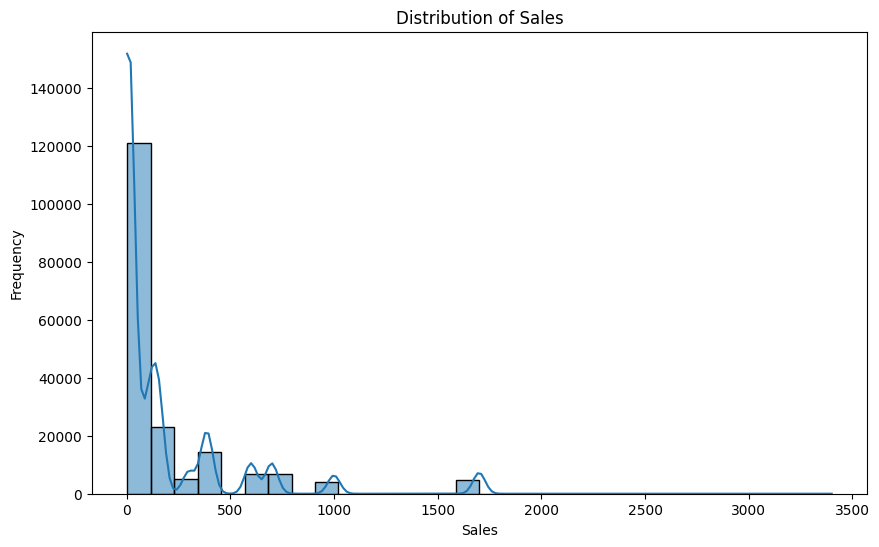

In [16]:
# Plotting the distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(sales_df['Sales'], kde=True, bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

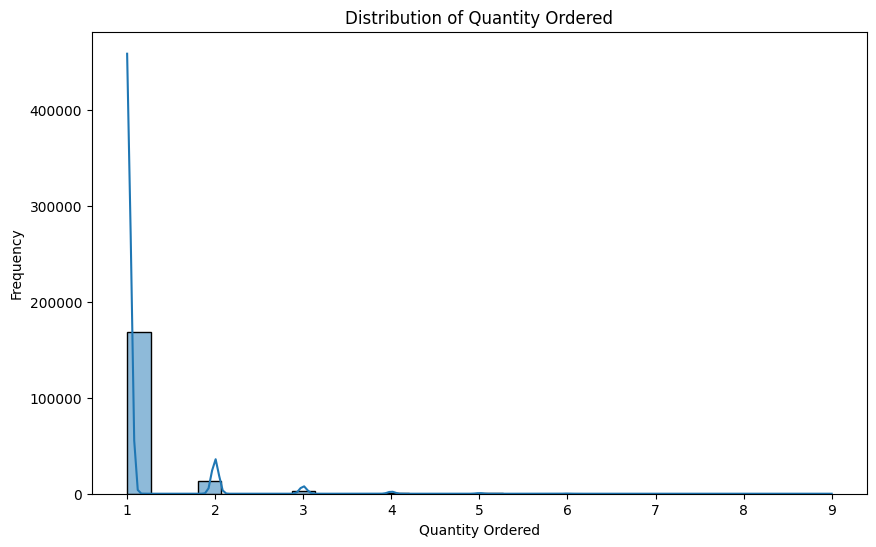

In [17]:
# Plotting the distribution of Quantity Ordered
plt.figure(figsize=(10, 6))
sns.histplot(sales_df['Quantity Ordered'], kde=True, bins=30)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

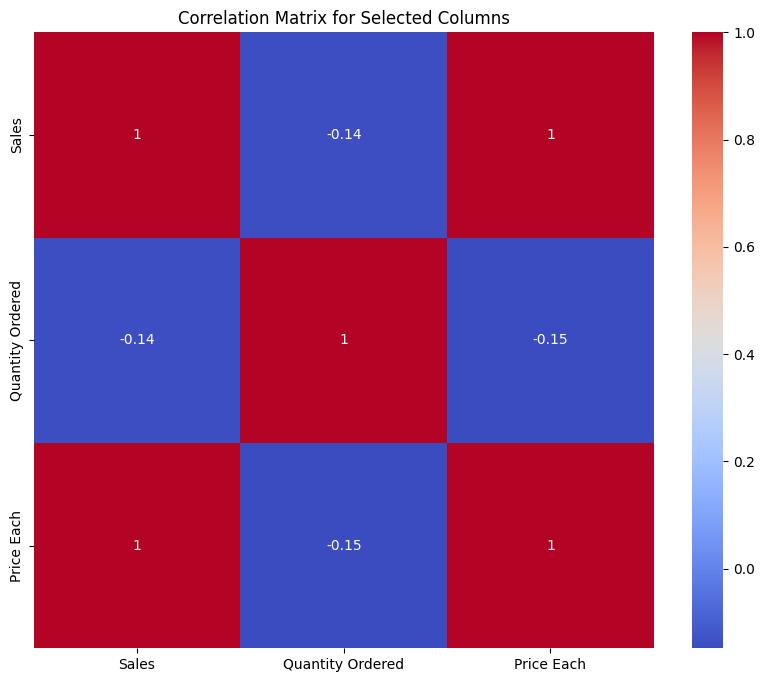

In [18]:
# Select specific columns for the correlation matrix
selected_columns = ['Sales', 'Quantity Ordered', 'Price Each']
corr_matrix = sales_df[selected_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Columns')
plt.show()


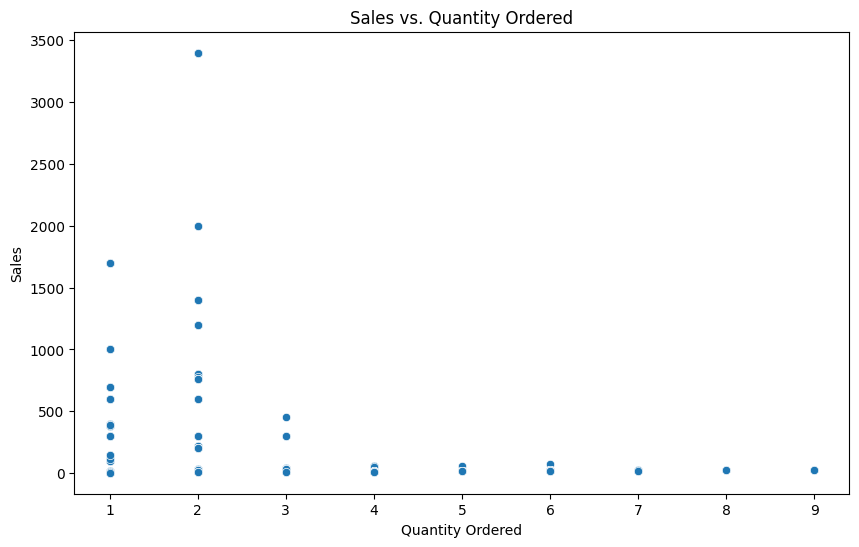

In [19]:
# Scatter plot between Sales and Quantity Ordered
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity Ordered', y='Sales', data=sales_df)
plt.title('Sales vs. Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

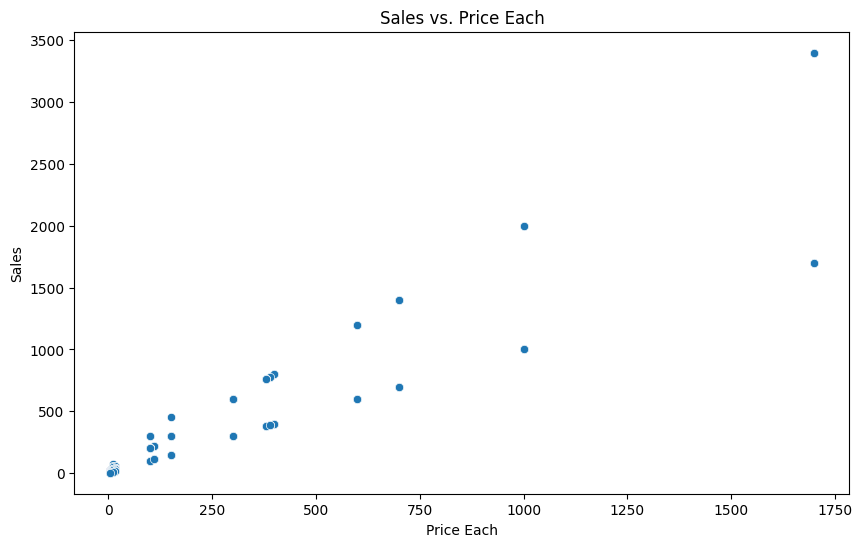

In [20]:
# Scatter plot between Sales and Price Each
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Sales', data=sales_df)
plt.title('Sales vs. Price Each')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()

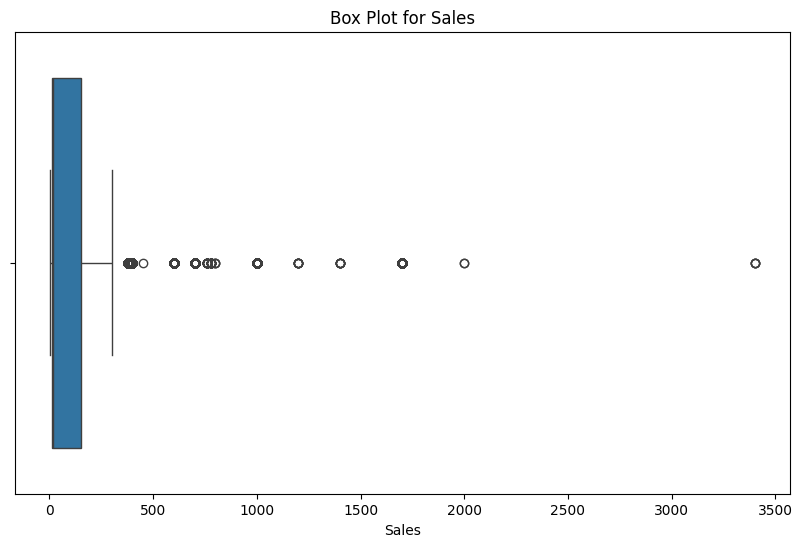

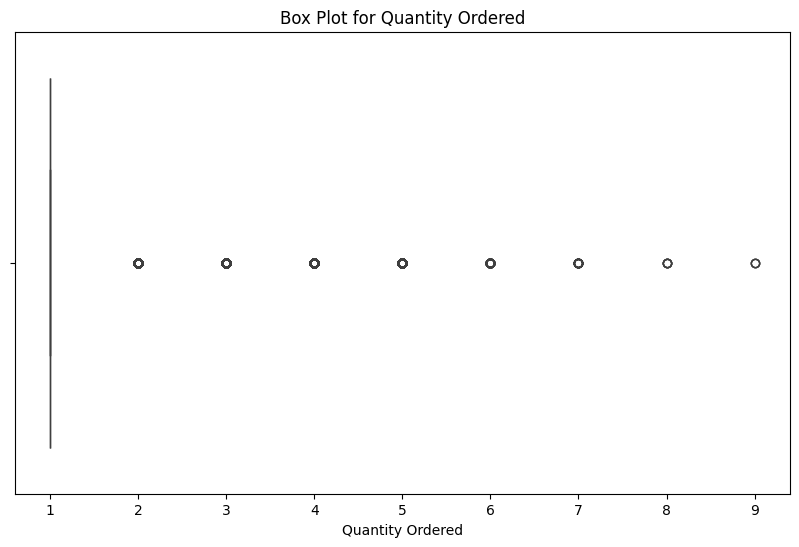

In [21]:
# Box plot for Sales to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_df['Sales'])
plt.title('Box Plot for Sales')
plt.xlabel('Sales')
plt.show()

# Box plot for Quantity Ordered to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_df['Quantity Ordered'])
plt.title('Box Plot for Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.show()

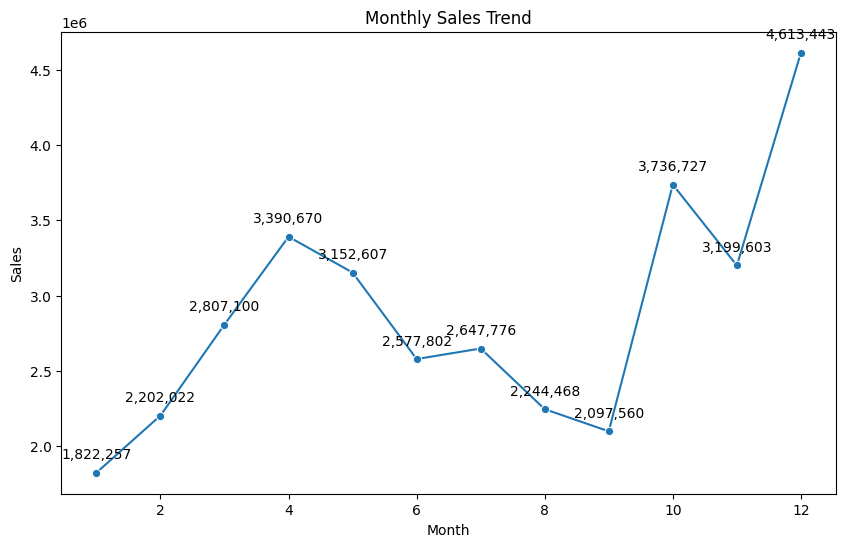

In [22]:
# Menghitung penjualan bulanan
df_monthly_sales = sales_df.groupby('Month')['Sales'].sum().reset_index()

# Plotting Sales over Months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=df_monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')

# Menambahkan label angka di setiap dot
for i in range(len(df_monthly_sales)):
    plt.annotate(f'{df_monthly_sales["Sales"][i]:,.0f}',  # Menambahkan tanda koma dan tanpa desimal
                 (df_monthly_sales['Month'][i], df_monthly_sales['Sales'][i]),
                 textcoords="offset points",
                 xytext=(0, 10),  # Mengatur posisi teks agar sedikit di atas titik
                 ha='center')

plt.show()

# Question to Answer

### Which products are the most and least popular?

In [23]:
# Group by 'Product' and sum the 'Quantity Ordered' to get the total quantity for each product
product_popularity = sales_df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the data to find the most popular products
product_popularity_sorted = product_popularity.sort_values(by='Quantity Ordered', ascending=False)

# Get the top 5 most popular products
top_5_products = product_popularity_sorted.head(5)

print(top_5_products)

                     Product  Quantity Ordered
5     AAA Batteries (4-pack)             31017
4      AA Batteries (4-pack)             27635
15      USB-C Charging Cable             23975
12  Lightning Charging Cable             23217
17          Wired Headphones             20557


In [24]:
# Group by 'Product' and sum the 'Quantity Ordered' to get the total quantity for each product
product_popularity = sales_df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the data to find the most and least popular products
least_product_popularity_sorted = product_popularity.sort_values(by='Quantity Ordered', ascending=True) # Sort ascending for least popular

# Get the top 5 least popular products
bottom_5_products = least_product_popularity_sorted.head(5)

print(bottom_5_products)

               Product  Quantity Ordered
10            LG Dryer               646
11  LG Washing Machine               666
16     Vareebadd Phone              2068
0         20in Monitor              4129
14     ThinkPad Laptop              4130


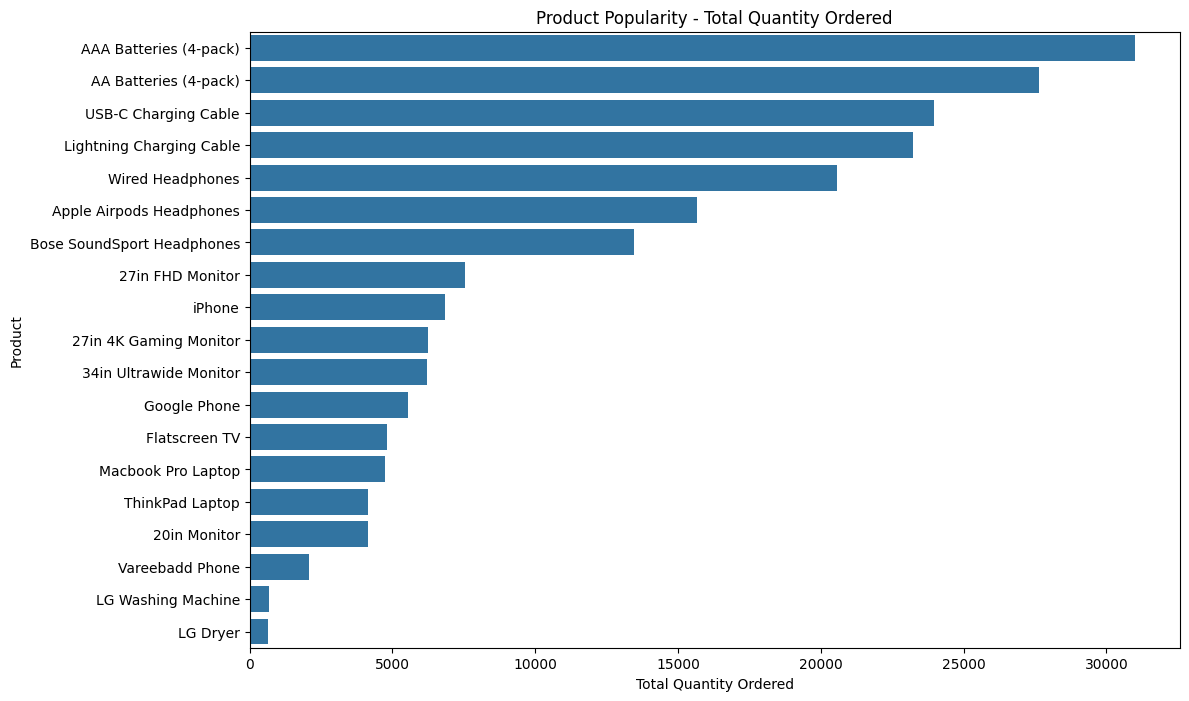

In [25]:
# Plot the popularity of products
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity Ordered', y='Product', data=product_popularity_sorted)
plt.title('Product Popularity - Total Quantity Ordered')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product')
plt.show()

### Answer :
Most Popular :  AAA Batteries (4-pack)

Least Popular : LG Dryer

### What time of day should the company focus its marketing efforts?

In [26]:
 # Group by 'Hour' and sum the 'Sales' to get total sales for each hour
sales_by_hour = sales_df.groupby('Hour')['Sales'].sum().reset_index()

# Sort by hour to maintain the order
sales_by_hour = sales_by_hour.sort_values(by='Hour')

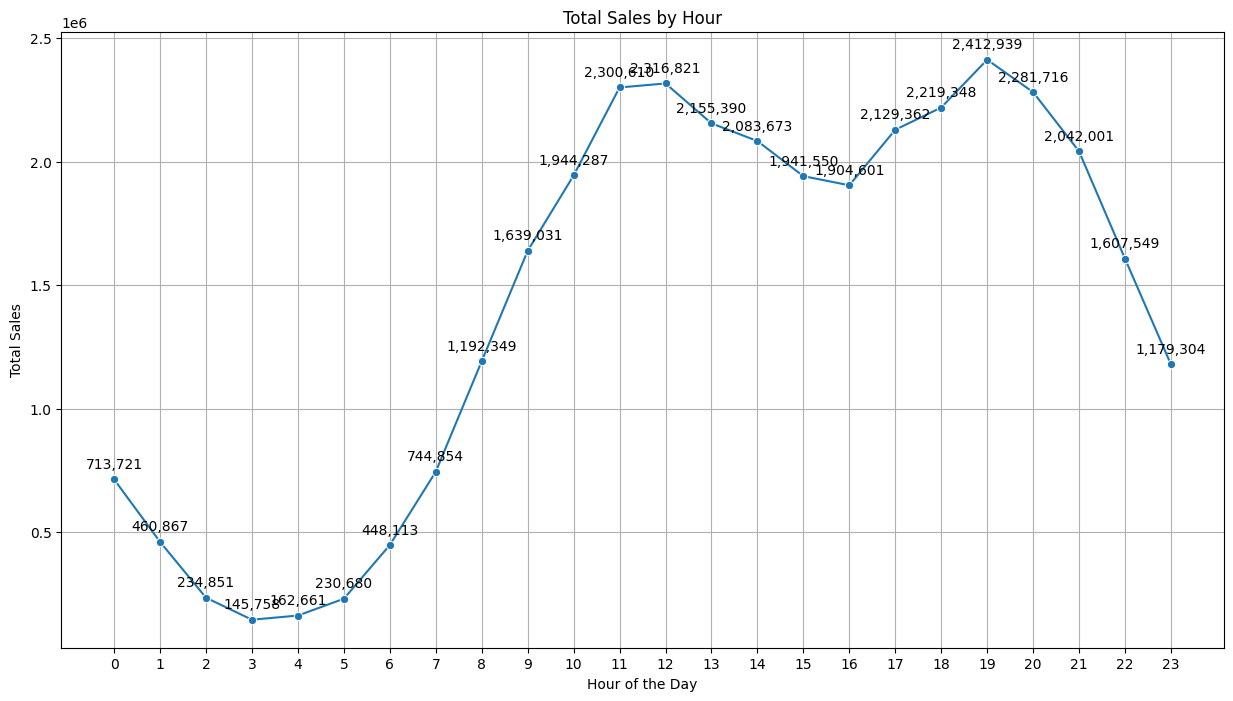

In [27]:
# Plot sales by hour
plt.figure(figsize=(15, 8))
sns.lineplot(x='Hour', y='Sales', data=sales_by_hour, marker='o')
plt.title('Total Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))  # Set x-axis to show all hours
plt.grid(True)

# Menambahkan label angka di setiap dot
for i in range(len(sales_by_hour)):
    plt.annotate(f'{sales_by_hour["Sales"][i]:,.0f}',  # Format angka dengan koma untuk ribuan
                 (sales_by_hour['Hour'][i], sales_by_hour['Sales'][i]),
                 textcoords="offset points",
                 xytext=(0, 8),  # Mengatur posisi teks sedikit di atas titik
                 ha='center')

plt.show()

In [28]:
# Identify the hour with the maximum sales
peak_hour = sales_by_hour[sales_by_hour['Sales'] == sales_by_hour['Sales'].max()]

print("Peak Hour for Sales:", peak_hour['Hour'].values[0])

Peak Hour for Sales: 19


### Answer : 7 PM / 19:00

### Which cities generate the highest and lowest sales?

In [29]:
# Group by 'City' and sum the 'Sales' to get total sales for each city
sales_by_city = sales_df.groupby('City')['Sales'].sum().reset_index()

# Sort the data to easily identify the highest and lowest sales
sales_by_city_sorted = sales_by_city.sort_values(by='Sales', ascending=False)

In [30]:
# City with the highest sales
highest_sales_city = sales_by_city_sorted.iloc[0]

# City with the lowest sales
lowest_sales_city = sales_by_city_sorted.iloc[-1]

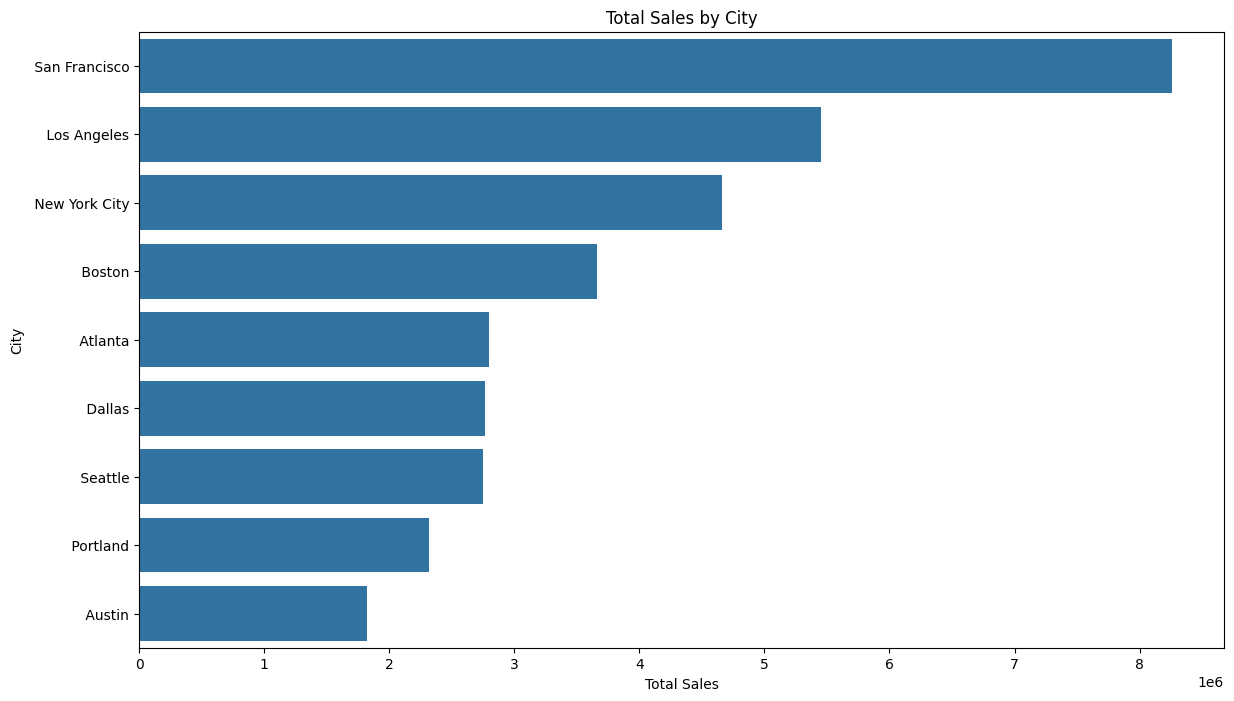

In [31]:
# Plot the sales by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='City', data=sales_by_city_sorted)
plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

### Answer :

In [32]:
print("City with the Highest Sales:", highest_sales_city['City'], "with total sales of", highest_sales_city['Sales'])
print("City with the Lowest Sales:", lowest_sales_city['City'], "with total sales of", lowest_sales_city['Sales'])

City with the Highest Sales:  San Francisco with total sales of 8262203.91
City with the Lowest Sales:  Austin with total sales of 1819581.75


### Are there any correlations between the time of year (months) and sales performance?

In [33]:
# Group by 'Month' and sum the 'Sales' to get total sales for each month
sales_by_month = sales_df.groupby('Month')['Sales'].sum().reset_index()

# Optionally, sort the months if they are not in order (assuming Month is 1-12)
sales_by_month = sales_by_month.sort_values(by='Month')

In [34]:
# Calculate the correlation between Month and Sales
correlation = sales_by_month['Month'].corr(sales_by_month['Sales'])

### Answer :

In [35]:
print(f"Correlation between Month and Sales: {correlation}")

Correlation between Month and Sales: 0.5891558934399428


In [36]:
sales_df.to_csv('sales_data_mod.csv', index=False)